1. Моделировать выборку из а) распределения exp(1) б) распределения Коши с помощью метода
обратной функции. Построить гистограмму, сравнить со встроенным методом.

A. ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ Exp(1)
Распределение: Exp(1)
Размер выборки: 10000
Статистики:
Метод Среднее Ст.откл Минимум Максимум
Метод обратной функции 1.0067 1.0189 0.0000 10.7266
Встроенный метод 2.0045 1.0108 1.0000 11.0123


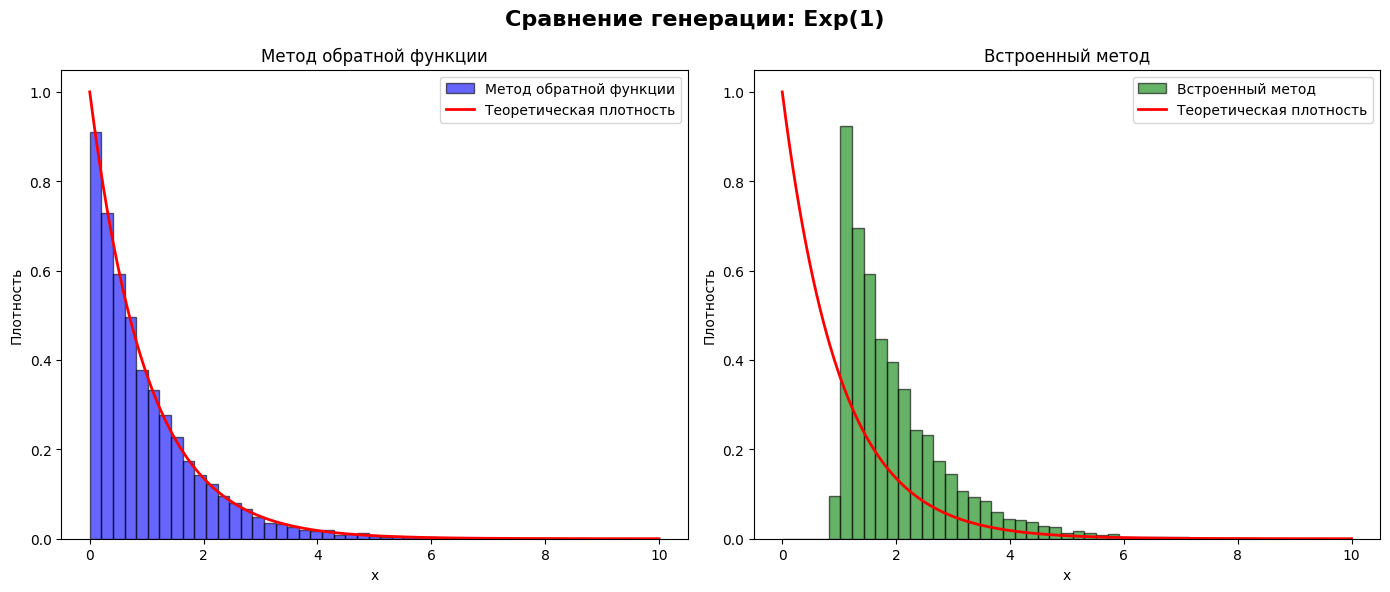

B. РАСПРЕДЕЛЕНИЕ КОШИ
Распределение: Cauchy(loc=0, scale=1)
Размер выборки: 10000
Статистики:
Метод Среднее Ст.откл Минимум Максимум
Метод обратной функции -0.0642 79.1365 -6061.0098 2823.1840
Встроенный метод -0.0891 36.0115 -1605.2354 1869.1246


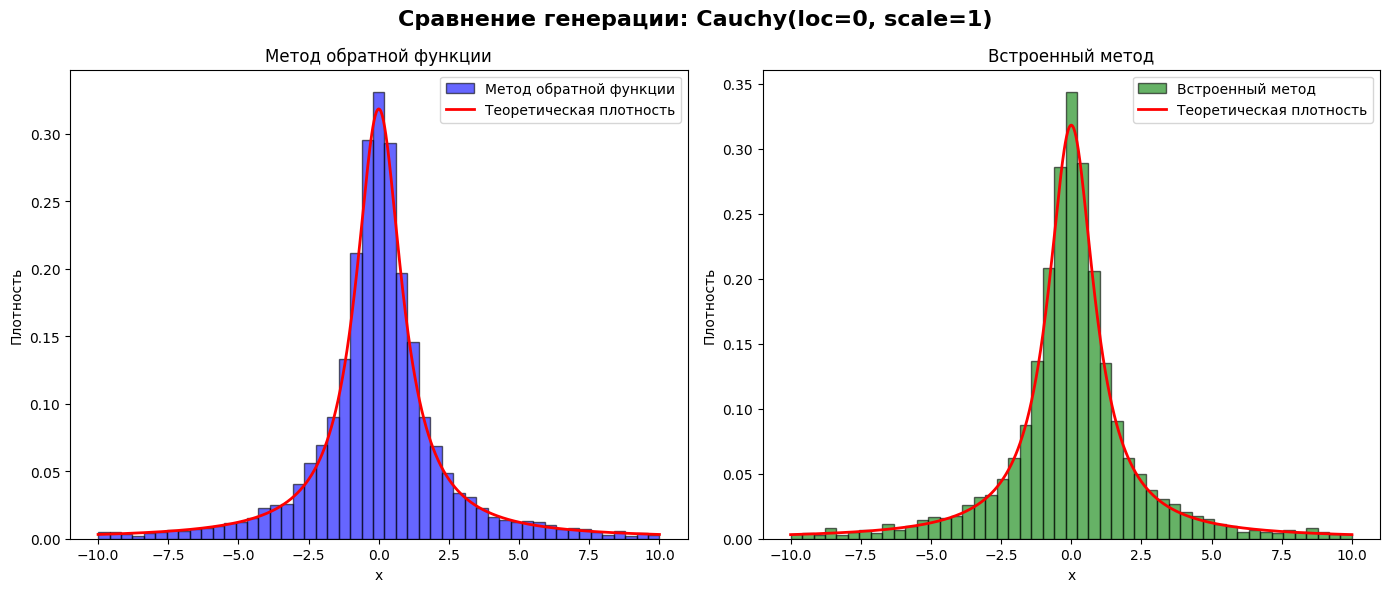

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, cauchy


def inverse_transform_exponential(n=10000, lam=1):
    """
    Генерация выборки из экспоненциального распределения Exp(λ) 
    методом обратной функции
    
    Теория:
    F(x) = 1 - exp(-λx), x ≥ 0
    F⁻¹(u) = -ln(1-u)/λ
    Так как 1-U имеет то же распределение, что и U, можно использовать:
    X = -ln(U)/λ
    """
    # Генерация равномерных случайных величин
    U = np.random.uniform(0, 1, n)
    
    # Применение обратной функции распределения
    X = -np.log(U) / lam
    
    return X

def inverse_transform_cauchy(n=10000, loc=0, scale=1):
    """
    Генерация выборки из распределения Коши методом обратной функции
    
    Теория:
    Функция распределения Коши:
    F(x) = 1/π * arctan((x-loc)/scale) + 1/2
    Обратная функция:
    F⁻¹(u) = loc + scale * tan(π*(u - 0.5))
    """
    # Генерация равномерных случайных величин
    U = np.random.uniform(0, 1, n)
    
    # Применение обратной функции распределения
    X = loc + scale * np.tan(np.pi * (U - 0.5))
    
    return X

def compare_generations(dist_name, inverse_func, builtin_func, params, 
                       sample_size=10000, bins=50):
    """
    Сравнение генерации методом обратной функции и встроенным методом
    
    dist_name: название распределения
    inverse_func: функция для генерации методом обратной функции
    builtin_func: встроенная функция для генерации
    params: параметры распределения
    sample_size: размер выборки
    bins: количество бинов в гистограмме
    """
    
    # 1. Генерация выборок
    print(f"Распределение: {dist_name}")
    print(f"Размер выборки: {sample_size}")
    
    # Метод обратной функции
    sample_inverse = inverse_func(sample_size, *params)
    #*params — оператор распаковки. Если params = (1,), то вызов будет inverse_func(sample_size, 1)
    # Встроенный метод
    sample_builtin = builtin_func(*params, size=sample_size)
    
    # 2. Вычисление статистик для сравнения
    stats_inverse = {
        'mean': np.mean(sample_inverse),
        'std': np.std(sample_inverse),
        'min': np.min(sample_inverse),
        'max': np.max(sample_inverse)
    }
    
    stats_builtin = {
        'mean': np.mean(sample_builtin),
        'std': np.std(sample_builtin),
        'min': np.min(sample_builtin),
        'max': np.max(sample_builtin)
    }
    
    # 3. Вывод статистик
    print("Статистики:")
    print(f"{'Метод'} {'Среднее'} {'Ст.откл'} {'Минимум'} {'Максимум'}")
    print(f"{'Метод обратной функции'} {stats_inverse['mean']:.4f} "
          f"{stats_inverse['std']:.4f} {stats_inverse['min']:.4f} "
          f"{stats_inverse['max']:.4f}")
    print(f"{'Встроенный метод'} {stats_builtin['mean']:.4f} "
          f"{stats_builtin['std']:.4f} {stats_builtin['min']:.4f} "
          f"{stats_builtin['max']:.4f}")
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f'Сравнение генерации: {dist_name}', fontsize=16, fontweight='bold')
    
    # Определение диапазона для гистограммы
    if dist_name.startswith('Exp'):
        # Для экспоненциального - ограничиваем хвост
        x_min = 0
        x_max = 10  # Ограничиваем для наглядности
        bins_range = np.linspace(x_min, x_max, bins)
        
        # Теоретическая плотность
        x_theory = np.linspace(x_min, x_max, 1000)
        pdf_theory = expon.pdf(x_theory, scale=1/params[0])
    else:
        # Для Коши - ограничиваем центральную часть (тяжелые хвосты)
        x_min = -10
        x_max = 10
        bins_range = np.linspace(x_min, x_max, bins)
        
        # Теоретическая плотность
        x_theory = np.linspace(x_min, x_max, 1000)
        pdf_theory = cauchy.pdf(x_theory, loc=params[0], scale=params[1])
    
    # 5. Гистограмма для метода обратной функции
    ax1 = axes[0]
    ax1.hist(sample_inverse, bins=bins_range, density=True, alpha=0.6, 
             color='blue', edgecolor='black', label='Метод обратной функции')
    #density=True: Нормализует гистограмму так, чтобы площадь под ней равнялась 1. 
    #Это позволяет корректно сравнивать ее с теоретической плотность (PDF).
    ax1.plot(x_theory, pdf_theory, 'r-', linewidth=2, label='Теоретическая плотность')
    ax1.set_title('Метод обратной функции')
    ax1.set_xlabel('x')
    ax1.set_ylabel('Плотность')
    ax1.legend()
    
    # 6. Гистограмма для встроенного метода
    ax2 = axes[1]
    ax2.hist(sample_builtin, bins=bins_range, density=True, alpha=0.6, 
             color='green', edgecolor='black', label='Встроенный метод')
    ax2.plot(x_theory, pdf_theory, 'r-', linewidth=2, label='Теоретическая плотность')
    ax2.set_title('Встроенный метод')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Плотность')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # ВОТ ЗДЕСЬ ДОБАВЛЯЕМ RETURN!
    return sample_inverse, sample_builtin

print("A. ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ Exp(1)")

# Сравнение генерации
exp_inverse, exp_builtin = compare_generations(
    dist_name='Exp(1)',
    inverse_func=inverse_transform_exponential,
    builtin_func=expon.rvs,
    params=(1,),  # λ=1
    sample_size=10000,
    bins=50
)

# Часть B: Распределение Коши
print("B. РАСПРЕДЕЛЕНИЕ КОШИ")

# Теория:
# Функция распределения Коши: F(x) = 1/π * arctan(x) + 1/2
# Обратная функция: F⁻¹(u) = tan(π*(u - 0.5))

# Сравнение генерации
cauchy_inverse, cauchy_builtin = compare_generations(
    dist_name='Cauchy(loc=0, scale=1)',
    inverse_func=inverse_transform_cauchy,
    builtin_func=cauchy.rvs,
    params=(0, 1),  # loc=0, scale=1
    sample_size=10000,
    bins=50
)

2. Моделировать выборку из равномерного распределения на единичном круге: а) методом выбора с отклонениями, б)* методом условных распределений, в) с помощью полярных координат.!

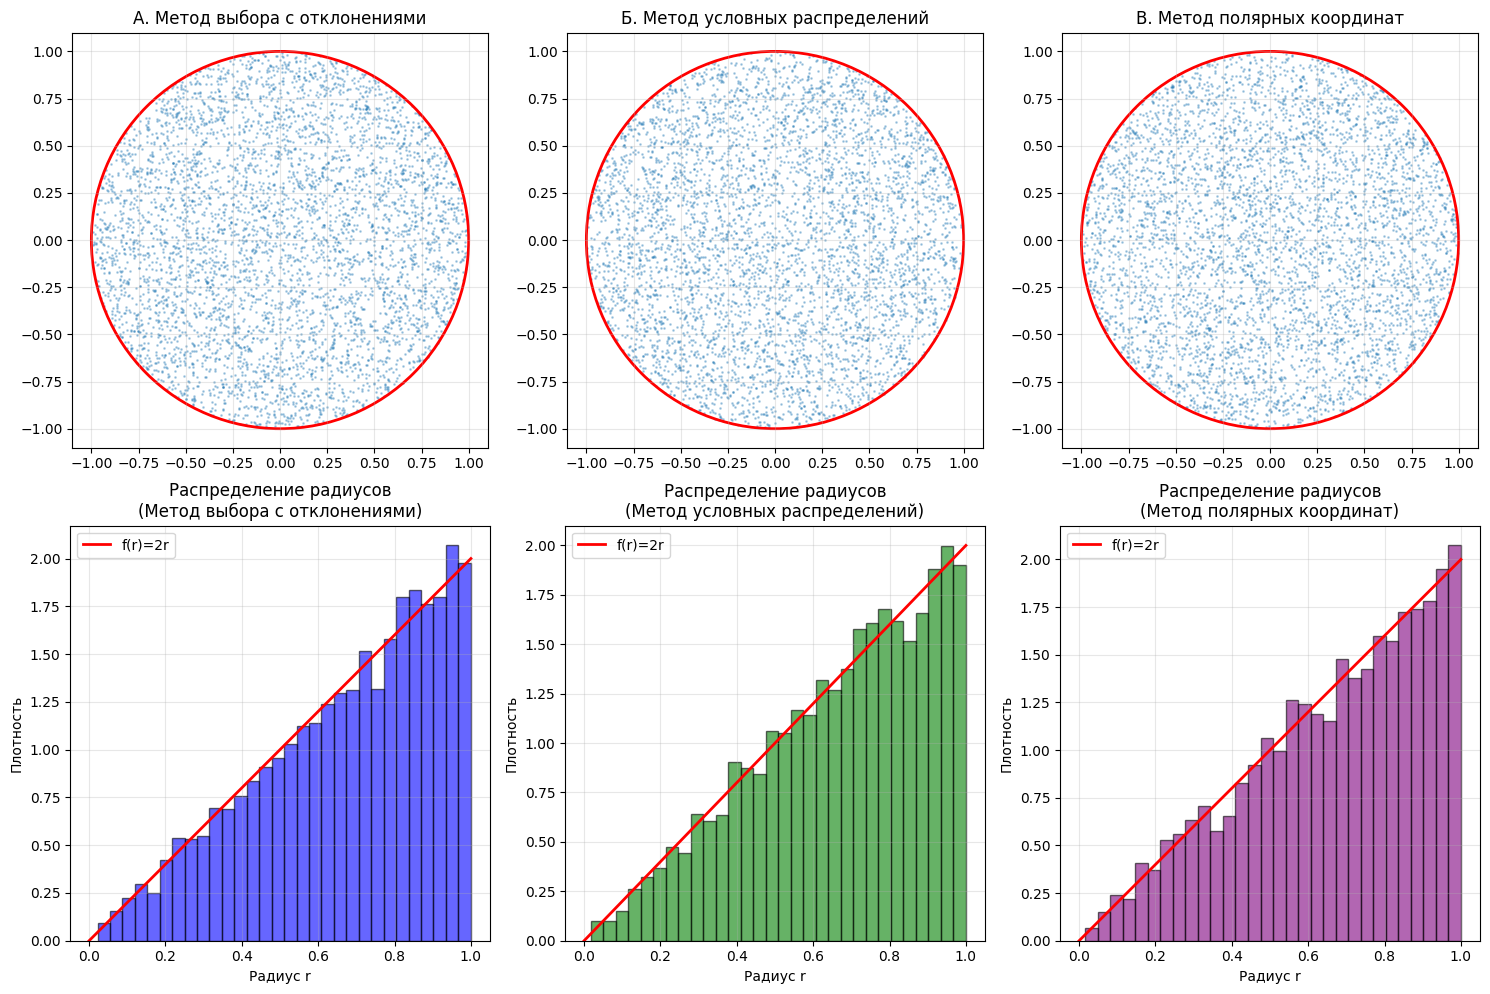

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def rejection_sampling_circle(n_points=10000):
    """
    Генерация точек в единичном круге методом выбора с отклонениями
    
    Алгоритм:
    1. Генерируем точки в квадрате [-1, 1] × [-1, 1]
    2. Отбираем только те точки, которые попадают в круг x² + y² ≤ 1
    3. Если нужно n точек, продолжаем до тех пор, пока не наберем нужное количество
    """
    points_x, points_y = [], []
    while len(points_x) < n_points:
        x = np.random.uniform(-1, 1, n_points)
        y = np.random.uniform(-1, 1, n_points)
        in_circle = x**2 + y**2 <= 1
        needed = n_points - len(points_x)
        points_x.extend(x[in_circle][:needed])
        points_y.extend(y[in_circle][:needed])
    return np.array(points_x), np.array(points_y)
"""
ТЕОРИЯ: МЕТОД УСЛОВНЫХ РАСПРЕДЕЛЕНИЙ ДЛЯ РАВНОМЕРНОГО РАСПРЕДЕЛЕНИЯ В КРУГЕ
Для равномерного распределения в круге x² + y² ≤ 1:

1. СОВМЕСТНАЯ ПЛОТНОСТЬ (X,Y):
   
   f_{X,Y}(x,y) = 1/π,  если x² + y² ≤ 1
                  0,    иначе
   
   Константа 1/π получается из нормировки: площадь круга = π,
   поэтому чтобы интеграл по всей площади равнялся 1, плотность = 1/π.

2. МАРГИНАЛЬНАЯ ПЛОТНОСТЬ X (получаем интегрированием по y):
   
   f_X(x) = ∫ f_{X,Y}(x,y) dy 
          = ∫_{-√(1-x²)}^{√(1-x²)} 1/π dy
          = (1/π) * [y]_{-√(1-x²)}^{√(1-x²)}
          = (1/π) * [√(1-x²) - (-√(1-x²))]
          = (1/π) * 2√(1-x²)
          = (2/π)√(1-x²),  для |x| ≤ 1

3. ФУНКЦИЯ РАСПРЕДЕЛЕНИЯ X:
   
   F_X(x) = ∫_{-1}^{x} f_X(t) dt
          = ∫_{-1}^{x} (2/π)√(1-t²) dt
   
   Этот интеграл вычисляется численно или через тригонометрическую подстановку.

4. УСЛОВНАЯ ПЛОТНОСТЬ Y|X=x:
   
   f_{Y|X}(y|x) = f_{X,Y}(x,y) / f_X(x)
                = (1/π) / [(2/π)√(1-x²)]
                = 1 / [2√(1-x²)]
   
   для |y| ≤ √(1-x²), и 0 иначе.
   
   Это РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ на отрезке [-√(1-x²), √(1-x²)]!

5. УСЛОВНАЯ ФУНКЦИЯ РАСПРЕДЕЛЕНИЯ Y|X=x:
   
   Для равномерного распределения на [a,b]:
   F(y) = (y - a)/(b - a)
   
   В нашем случае: a = -√(1-x²), b = √(1-x²)
   b - a = 2√(1-x²)
   
   Поэтому:
   F_{Y|X}(y|x) = [y - (-√(1-x²))] / [2√(1-x²)]
                = (y + √(1-x²)) / [2√(1-x²)]

   ОБРАТНАЯ ФУНКЦИЯ:
   u = F_{Y|X}(y|x) = (y + √(1-x²)) / [2√(1-x²)]
   => y + √(1-x²) = 2u√(1-x²)
   => y = 2u√(1-x²) - √(1-x²)
   => F_{Y|X}^{-1}(u|x) = 2u√(1-x²) - √(1-x²)
   
АЛГОРИТМ ГЕНЕРАЦИИ:

ШАГ 1: Генерация X
------------------
1. Генерируем U₁ ∼ Uniform(0,1)*-++
2. Находим X = F_X^{-1}(U₁), где F_X^{-1} - обратная функция распределения X

ШАГ 2: Генерация Y при условии X=x
----------------------------------
1. Для полученного x вычисляем y_max = √(1-x²)
2. Генерируем U₂ ∼ Uniform(0,1)
3. Находим Y = 2*U₂*y_max - y_max
"""
def conditional_distribution_circle(n_points=10000):
    """Метод условных распределений"""
    x_grid = np.linspace(-1, 1, 1000)
    f_x = (2/np.pi) * np.sqrt(1 - x_grid**2)
    F_x = np.cumsum(f_x) * (x_grid[1]-x_grid[0])
    F_x = F_x / F_x[-1]
    inv_F = interp1d(F_x, x_grid, kind='linear', bounds_error=False)
    
    U1 = np.random.uniform(0, 1, n_points)
    X = inv_F(U1)
    y_range = np.sqrt(1 - X**2)
    Y = 2 * np.random.uniform(0, 1, n_points) * y_range - y_range
    return X, Y

def polar_coordinates_circle(n_points=10000):
    """Метод полярных координат"""
    r = np.sqrt(np.random.uniform(0, 1, n_points))
    theta = np.random.uniform(0, 2*np.pi, n_points)
    return r * np.cos(theta), r * np.sin(theta)

n_points = 5000
x_rej, y_rej = rejection_sampling_circle(n_points)
x_cond, y_cond = conditional_distribution_circle(n_points)
x_polar, y_polar = polar_coordinates_circle(n_points)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

methods_data = [
    (x_rej, y_rej, 'А. Метод выбора с отклонениями'),
    (x_cond, y_cond, 'Б. Метод условных распределений'),
    (x_polar, y_polar, 'В. Метод полярных координат')
]

for i, (x, y, title) in enumerate(methods_data):
    ax = axes[0, i]
    ax.scatter(x, y, alpha=0.3, s=1)
    ax.add_artist(plt.Circle((0, 0), 1, color='red', fill=False, linewidth=2))
    ax.set_xlim(-1.1, 1.1); ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal'); ax.set_title(title)
    ax.grid(True, alpha=0.3)
"""
f_{X,Y}(x,y) = 1/π, x²+y²≤1

В полярных координатах: x=r·cosθ, y=r·sinθ, |J|=r
f_{R,Θ}(r,θ) = (1/π)·r

Маргинальная плотность R:
f_R(r) = ∫₀^{2π} (1/π)·r dθ = 2r, 0≤r≤1

∫₀¹ 2r dr = [r²]₀¹ = 1 ✓
"""

for i, (x, y, title) in enumerate(methods_data):
    ax = axes[1, i]
    radii = np.sqrt(x**2 + y**2)
    ax.hist(radii, bins=30, density=True, alpha=0.6, 
            color=['blue', 'green', 'purple'][i], edgecolor='black')
    
    # Теоретическая кривая для равномерного распределения в круге
    r_vals = np.linspace(0, 1, 100)
    f_r = 2 * r_vals  # f(r) = 2r
    ax.plot(r_vals, f_r, 'r-', linewidth=2, label='f(r)=2r')
    
    ax.set_title(f'Распределение радиусов\n({title.split(".")[1].strip()})')
    ax.set_xlabel('Радиус r'); ax.set_ylabel('Плотность')
    ax.legend(); ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

3. Моделировать выборку с плотностью а) Лапласа б) exp(−x)/2, x > 0 и exp(2x), x < 0. Построить
гистограмму. (Использовать смеси распределений.)

"""
ОБЪЯСНЕНИЕ ГЕНЕРАЦИИ РАСПРЕДЕЛЕНИЯ ЛАПЛАСА:

Плотность Лапласа: f(x) = (1/2) * exp(-|x|)

Алгоритм смеси:
1. С вероятностью 1/2 генерируем левую половину (x < 0)
2. С вероятностью 1/2 генерируем правую половину (x ≥ 0)

Для левой половины (x < 0):
- Берем Y ~ Exp(1) (экспоненциальное с λ=1), Y > 0
- Полагаем X = -Y
- Тогда плотность: f_X(x) = f_Y(y) * |dx/dy|⁻¹ = exp(-y) = exp(x)
- Но x отрицательный, так что exp(x) = exp(-|x|)

Для правой половины (x ≥ 0):
- Берем Y ~ Exp(1), Y > 0
- Полагаем X = Y
- Тогда плотность: f_X(x) = exp(-x) = exp(-|x|)

Каждая половина имеет вес 1/2, поэтому:
f(x) = (1/2)*exp(-|x|) для всех x

Код:
samples[left] = -np.random.exponential(1, n_left)   # x < 0
samples[~left] = np.random.exponential(1, n_right)  # x ≥ 0
"""
"""
ОБЪЯСНЕНИЕ ГЕНЕРАЦИИ СМЕСИ ЭКСПОНЕНЦИАЛЬНЫХ:

Дана плотность: f(x) = { exp(-x)/2, x > 0; exp(2x), x < 0 }

Проверка нормировки:
∫_{-∞}^{0} exp(2x) dx + ∫_{0}^{∞} exp(-x)/2 dx = 1/2 + 1/2 = 1

Алгоритм смеси:
1. С вероятностью 1/2 генерируем x < 0
2. С вероятностью 1/2 генерируем x > 0

Для x < 0:
Функция распределения: F(x) = exp(2x) для x < 0
Метод обратной функции: решаем u = F(x) = exp(2x)
=> ln(u) = 2x
=> x = ln(u)/2, где u ~ Uniform(0,1)

Так как 0 < u < 1, то ln(u) < 0, значит x < 0 ✓

Для x > 0:
Используем стандартное экспоненциальное распределение:
X ~ Exp(1) имеет плотность f(x) = exp(-x), x > 0
Нам нужно f(x) = exp(-x)/2, что в 2 раза меньше
Но мы выбираем правую половину с вероятностью 1/2, поэтому:
(1/2) * exp(-x) = exp(-x)/2 ✓

Код:
samples[left] = np.log(np.random.uniform(0, 1, n_left)) / 2  # x < 0
samples[~left] = np.random.exponential(1, n_right)          # x > 0
"""

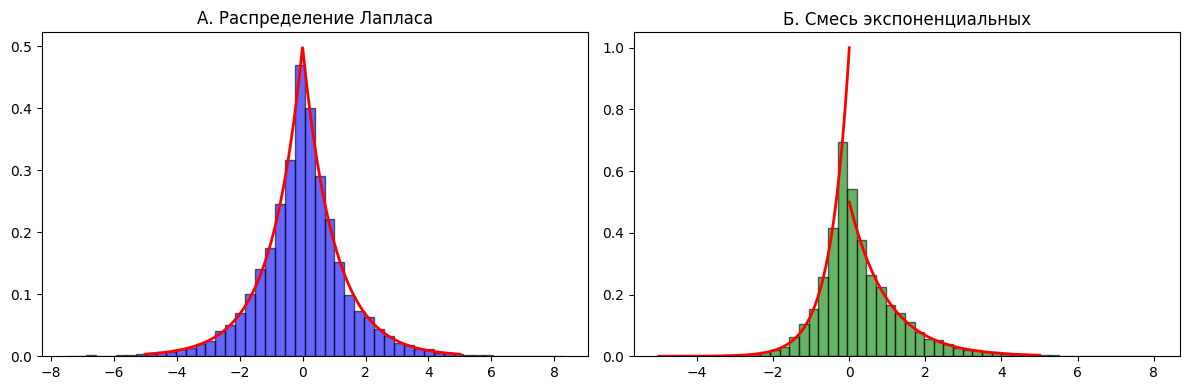

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# А. Распределение Лапласа
def laplace_mixture(n=10000):
    u = np.random.uniform(0, 1, n)
    samples = np.zeros(n)
    left = u < 0.5
    n_left = np.sum(left)
    samples[left] = -np.random.exponential(1, n_left)
    samples[~left] = np.random.exponential(1, n - n_left)
    return samples

# Б. Смесь экспоненциальных
def exp_mixture(n=10000):
    u = np.random.uniform(0, 1, n)
    samples = np.zeros(n)
    left = u < 0.5
    n_left = np.sum(left)
    samples[left] = np.log(np.random.uniform(0, 1, n_left)) / 2
    samples[~left] = np.random.exponential(1, n - n_left)
    return samples

# Визуализация
n = 10000
laplace = laplace_mixture(n)
exp_mix = exp_mixture(n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 1. Гистограмма Лапласа
ax1.hist(laplace, bins=50, density=True, alpha=0.6, color='blue', edgecolor='black')
x = np.linspace(-5, 5, 1000)
ax1.plot(x, 0.5*np.exp(-np.abs(x)), 'r-', linewidth=2)
ax1.set_title('А. Распределение Лапласа')

# 2. Гистограмма смеси экспоненциальных
ax2.hist(exp_mix, bins=50, density=True, alpha=0.6, color='green', edgecolor='black')
x_neg = np.linspace(-5, 0, 500)
x_pos = np.linspace(0, 5, 500)
ax2.plot(x_neg, np.exp(2*x_neg), 'r-', linewidth=2)
ax2.plot(x_pos, np.exp(-x_pos)/2, 'r-', linewidth=2)
ax2.set_title('Б. Смесь экспоненциальных')

plt.tight_layout()
plt.show()

5. Смоделировать с помощью алгоритма Acceptance-Rejection выборку из а) треугольного распреде-
ления (c плотностью (1 − |x|) I(x ∈ [−1, 1]))

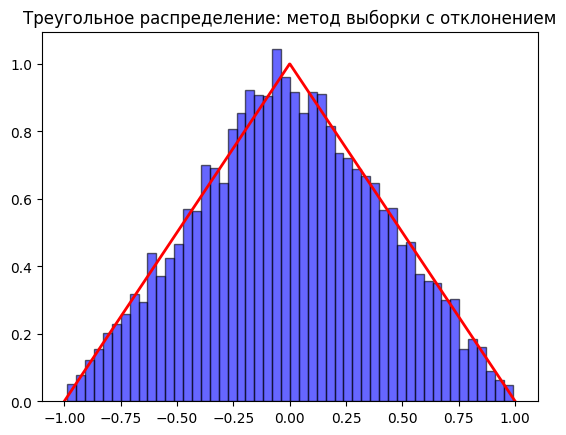

In [ ]:
"""
ТЕОРИЯ МЕТОДА ВЫБОРКИ С ОТКЛОНЕНИЕМ (ACCEPTANCE-REJECTION)
Для треугольного распределения с плотностью:
    f(x) = 1 - |x|, x ∈ [-1, 1]

1. ВЫБОР ВСПОМОГАТЕЛЬНОГО РАСПРЕДЕЛЕНИЯ g(x)
   Выбираем равномерное распределение на [-1, 1]:
        g(x) = 1/2, x ∈ [-1,  ­1]
   Это распределение мы умеем легко генерировать.

2. НАХОЖДЕНИЕ КОНСТАНТЫ c
   Вычисляем отношение плотностей:
        f(x)/g(x) = (1 - |x|) / (1/2) = 2 * (1 - |x|)
   Ищем максимум этой функции на [-1, 1]:
        При x = 0: 2 * (1 - 0) = 2
        При |x| = 1: 2 * (1 - 1) = 0
   Максимум достигается при x = 0 и равен 2.
   Поэтому выбираем: c = 2

3. АЛГОРИТМ ГЕНЕРАЦИИ:
   Повторяем до получения нужного числа выборок:
   а) Генерируем Y ∼ g(x) (равномерное на [-1, 1])
   б) Генерируем U ∼ Uniform(0, 1)
   в) Вычисляем вероятность принятия:
          p = f(Y) / (c * g(Y)) 
            = (1 - |Y|) / (2 * (1/2)) 
            = 1 - |Y|
   г) Если U ≤ p, принимаем X = Y
   д) Иначе возвращаемся к шагу (а)

4. ЭФФЕКТИВНОСТЬ МЕТОДА:
   Теоретическая эффективность = 1/c = 1/2 = 50%
   Это значит, что в среднем каждую вторую точку мы принимаем.

ПРОВЕРКА КОРРЕКТНОСТИ:
   ∫_{-1}^{1} f(x) dx = ∫_{-1}^{1} (1 - |x|) dx = 1 ✓
   E[X] = 0, Var(X) = 1/6
"""
import numpy as np
import matplotlib.pyplot as plt

# Метод выборки с отклонением для треугольного распределения
def triangular_rejection(n=10000):
    c = 2.0  # max(f(x)/g(x)) = max(2*(1-|x|)) = 2
    samples = []
    
    while len(samples) < n:
        Y = np.random.uniform(-1, 1)  # Генерируем из g(x) = 1/2
        U = np.random.uniform(0, 1)
        
        # f(Y)/(c*g(Y)) = (1-|Y|)/(2*0.5) = 1-|Y|
        if U <= (1 - abs(Y)):
            samples.append(Y)
    
    return np.array(samples)

# Визуализация
samples = triangular_rejection(10000)

plt.hist(samples, bins=50, density=True, alpha=0.6, color='blue', edgecolor='black')
x = np.linspace(-1, 1, 1000)
plt.plot(x, 1 - np.abs(x), 'r-', linewidth=2)
plt.title('Треугольное распределение: метод выборки с отклонением')
plt.show()